<a href="https://colab.research.google.com/github/ruperty/colab/blob/master/ecoli_v_derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of reorganisation mechcnisms

A demonstration of the difference between two method of determining the changes in weights to be applied to a learning system.

The two methods are gradient descent and ecoli tumbling.


# Regression

The example used is regression. That is, to find the best fit of a line for a random set of 2-dimensional data points.

# Installs and imports

In [1]:
# install of my own pct library
!git clone https://github.com/ruperty/pctx.git

Cloning into 'pctx'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 19), reused 68 (delta 18), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [6]:
import plotly.graph_objs as go
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pctx.dl.utils as uts
from pctx.utilities.rmath import Counter
from plotly.subplots import make_subplots

# The loss function

In [7]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

# Gradient Descent

In this section is the example using gradient descent.

The weight changes dW and db are dereived from the computation of the gradient of the error slope.

In [8]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

## Initial settings

In [9]:
r = [20.0, 2.0]
xs, ls, Ws, bs = [],[],[], []
model = uts.RegressionModel(r)
frames=30
counter = Counter(frames)
print('Initial loss: %1.6f' % loss(model.inputs, model.outputs).numpy())

Initial loss: 8.761532


## The graphics

Ignore the blank figure if you see it, I don't know why it is appearing.

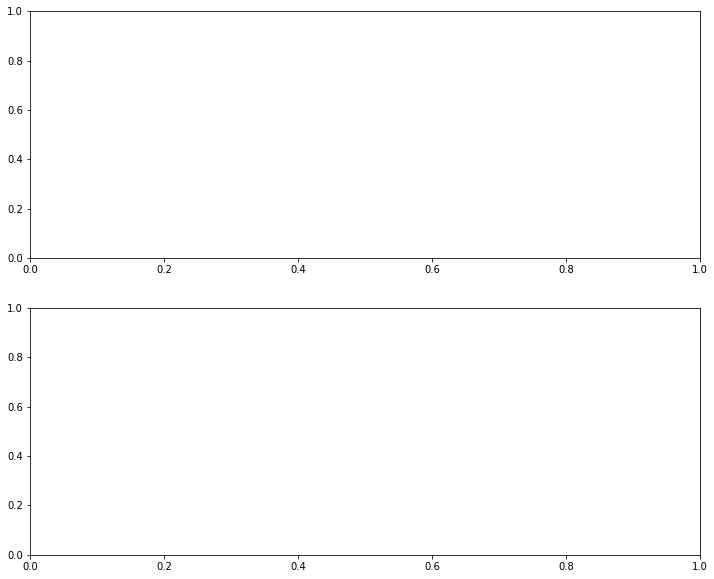

In [10]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

## The training loop

In [11]:
def animate(epoch):
    if epoch <= counter.get_limit():
      Ws.append(model.W.numpy())
      bs.append(model.b.numpy())
      current_loss = loss(model.outputs, model(model.inputs))

      train(model, model.inputs, model.outputs, learning_rate=0.1)
      #print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))
      ax1.clear()
      ax1.set_xlim([-4,4])
      ax1.set_ylim([-40,40])
      ax1.scatter(model.inputs, model.outputs, c='b')
      ax1.scatter(model.inputs, model(model.inputs), c='r')
      ax2.clear()
      xs.append(float(epoch))
      ls.append(current_loss)
      ax2.plot(xs, ls, 'r')
      if current_loss <  1.05:
            counter.set_limit(epoch) 

In [12]:
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=100, repeat=False)

## The Video

As you can see the gradient descent method quickly minimises the error within around 15 cycles. 

In [13]:
HTML(ani.to_jshtml())

In [14]:
print('Final loss: %1.6f' % loss(model(model.inputs), model.outputs).numpy())

Final loss: 1.028807


# Ecoli

The ecoli method selects random changes to the weights. However, the frequency of change is less if the error is reducing. 

In [15]:
from pctx.dl.optimizers import EcoliPeriodic
from pctx.dl.utils import RegressionCase
from pctx.plots.matplots import Plotter

## Initial settings

In [27]:
learning_rate=1
optimizer = EcoliPeriodic(2, learning_rate, loss)
model = uts.RegressionModel(r)
case = RegressionCase(model,  optimizer)
frames=100
counter = Counter(frames)
print('Initial loss: %1.6f' % loss(model(model.inputs), model.outputs).numpy())

Initial loss: 300.383667


## The graphics

Ignore the blank figure if you see it, I don't know why it is appearing.

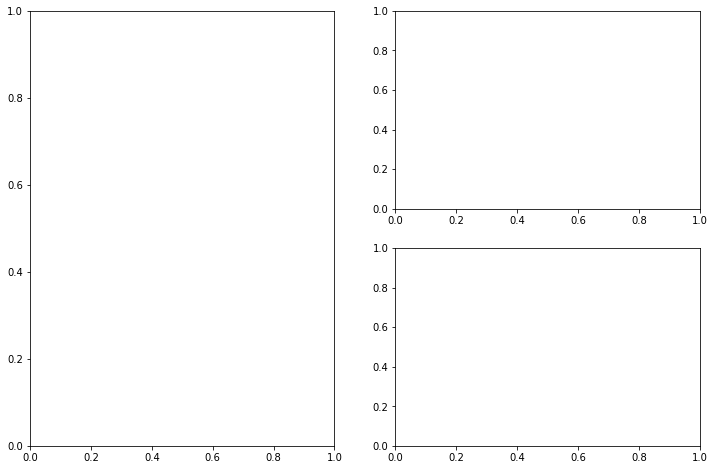

In [28]:
plotter = Plotter(12,8)

## The training loop

In [29]:
def animate_ecoli(epoch):
    if epoch <= counter.get_limit():
        case()
        plotter.add_data(epoch, model, optimizer)
        plotter.draw(model)
        #print('Epoch %2d: W=%1.2f b=%1.2f, dW=%1.2f, db=%1.2f, dWc=%1.2f, dbc=%1.2f, loss=%2.5f' % (epoch, plotter.Ws[-1], plotter.bs[-1], optimizer.dWeights[0], optimizer.dWeights[1], optimizer.updates[0], optimizer.updates[1], optimizer.previous_loss))
        if optimizer.previous_loss <  1.05:
            counter.set_limit(epoch) 

In [30]:
ani_ecoli = animation.FuncAnimation(plotter.fig, animate_ecoli, interval=100, frames=frames, repeat=False)

## The Video

The minimisation takes quite a bit longer than gradient descent. The loss graph and changes in the derived line are pretty erratic compared to gradient descent, often going in the wrong direction.

However, the optimum line is found, so shows the power of directed random changes.

In [31]:
HTML(ani_ecoli.to_jshtml())

<Figure size 432x288 with 0 Axes>

In [32]:
print('Final loss: %1.6f' % loss(model(model.inputs), model.outputs).numpy())

Final loss: 1.393268
